In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\naman\Downloads\archive (5)\Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.shape

(10682, 11)

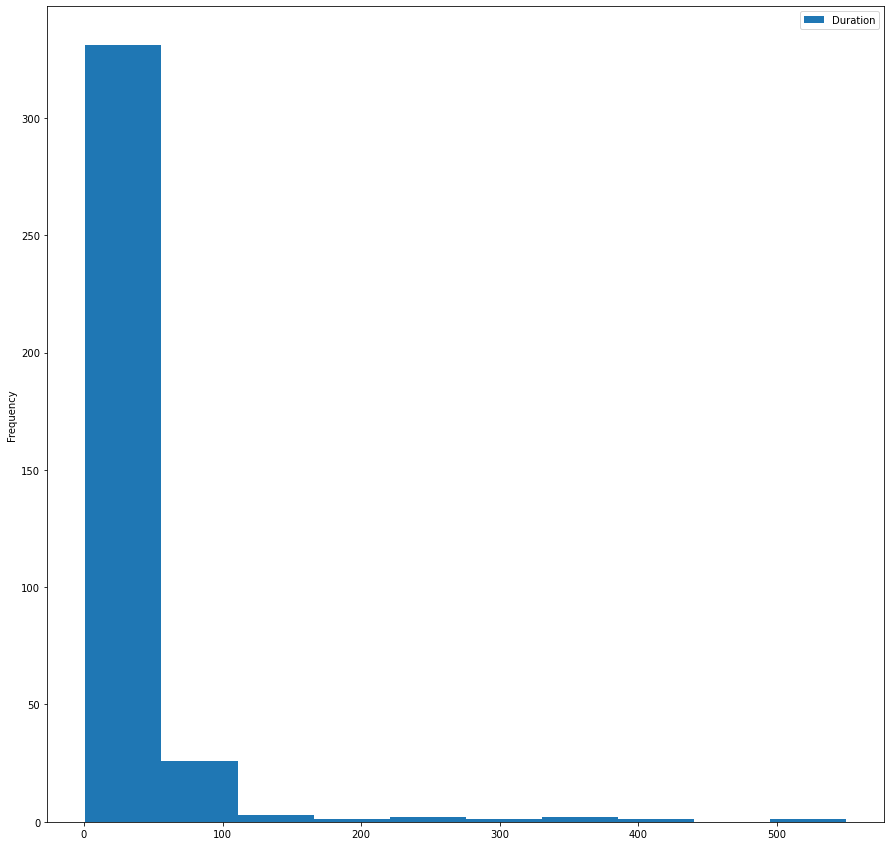

In [20]:
plt.figure(figsize=(15,15))
df["Duration"].value_counts().plot(kind='hist')
plt.legend()

In [21]:
df["journey_day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [22]:
df["journey_month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [23]:
df.drop(columns=["Date_of_Journey"],axis=1,inplace=True)

In [24]:
df["dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [25]:
df["arr_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["arr_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [28]:
df.drop(columns=["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [30]:
len(df["Duration"])

10682

In [31]:
df.shape

(10682, 14)

In [32]:
dur=list(df["Duration"])

In [33]:
dur_hr=[]
dur_min=[]
for i in range(len(dur)):
    if len(dur[i].split()) !=2:
        if "h" in dur[i]:
            dur[i]=dur[i].strip()+ " 0m"
        else:
            dur[i]="0h "+ dur[i]

In [35]:
for i in range(len(dur)):
    dur_hr.append(int(dur[i].split(sep="h")[0]))
    dur_min.append(int(dur[i].split(sep="m")[0].split()[-1]))
    

In [38]:
df["duration_hr"]=dur_hr
df["duration_min"]=dur_min

In [39]:
df.drop(["Duration"],axis=1,inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [43]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [44]:
Air=df[["Airline"]]
Air=pd.get_dummies(Air,drop_first=True)
Air.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


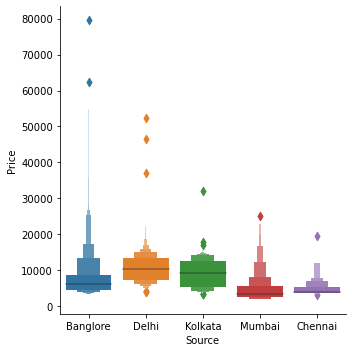

In [45]:
sns.catplot(x="Source",y="Price",data=df.sort_values("Price",ascending=False),kind='boxen')

In [46]:
Sc=df[["Source"]]
Sc=pd.get_dummies(Sc,drop_first=True)

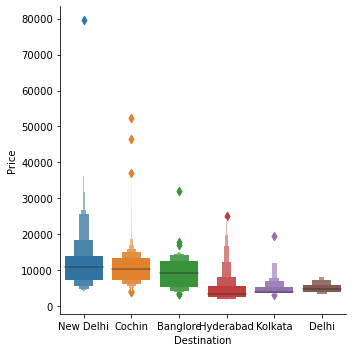

In [47]:
sns.catplot(x="Destination",y="Price",data=df.sort_values("Price",ascending=False),kind='boxen')

In [48]:
Dest=df[["Destination"]]
Dest=pd.get_dummies(Dest,drop_first=True)

In [49]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [50]:
df["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXB → DEL → BLR             1
CCU → VTZ → BLR                   1
BOM → GOI → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [51]:
df.drop(columns=["Route","Additional_Info"],axis=1,inplace=True)

In [52]:
df=pd.concat([df,Air,Sc,Dest],axis=1)

In [53]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df.drop(columns=["Airline","Source","Destination"],axis=1,inplace=True)

In [56]:
df.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hr,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
df["Total_Stops"]=le.fit_transform(df["Total_Stops"])

In [60]:
df.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hr,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df["Total_Stops"].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [63]:
df.shape

(10682, 30)

In [80]:
df1=pd.read_excel(r"C:\Users\naman\Downloads\archive (5)\Test_set.xlsx")

In [81]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [82]:
df1.dropna(inplace=True)

In [83]:
df1["journey_day"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.day
df1["journey_month"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.month
df1["dep_hour"]=pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["dep_min"]=pd.to_datetime(df1["Dep_Time"]).dt.minute
df1["arr_hour"]=pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["arr_min"]=pd.to_datetime(df1["Arrival_Time"]).dt.minute

In [84]:
dur=list(df1["Duration"])
dur_hr=[]
dur_min=[]
for i in range(len(dur)):
    if len(dur[i].split()) !=2:
        if "h" in dur[i]:
            dur[i]=dur[i].strip()+ " 0m"
        else:
            dur[i]="0h "+ dur[i]
for i in range(len(dur)):
    dur_hr.append(int(dur[i].split(sep="h")[0]))
    dur_min.append(int(dur[i].split(sep="m")[0].split()[-1]))
    
df1["duration_hr"]=dur_hr
df1["duration_min"]=dur_min

In [85]:
Air=df1[["Airline"]]
Air=pd.get_dummies(Air,drop_first=True)
Air.head()
Sc=df1[["Source"]]
Sc=pd.get_dummies(Sc,drop_first=True)
Dest=df1[["Destination"]]
Dest=pd.get_dummies(Dest,drop_first=True)

In [86]:
df1=pd.concat([df1,Air,Sc,Dest],axis=1)

In [87]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,0,0,0,0,0,0,1,0,0,0


In [88]:
df1["Total_Stops"]=le.fit_transform(df1["Total_Stops"])

In [89]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hr', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [90]:
df1.drop(columns=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration',
       'Additional_Info'],axis=1,inplace=True)

In [91]:
df1.shape

(2671, 28)

In [92]:
df1.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hr,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


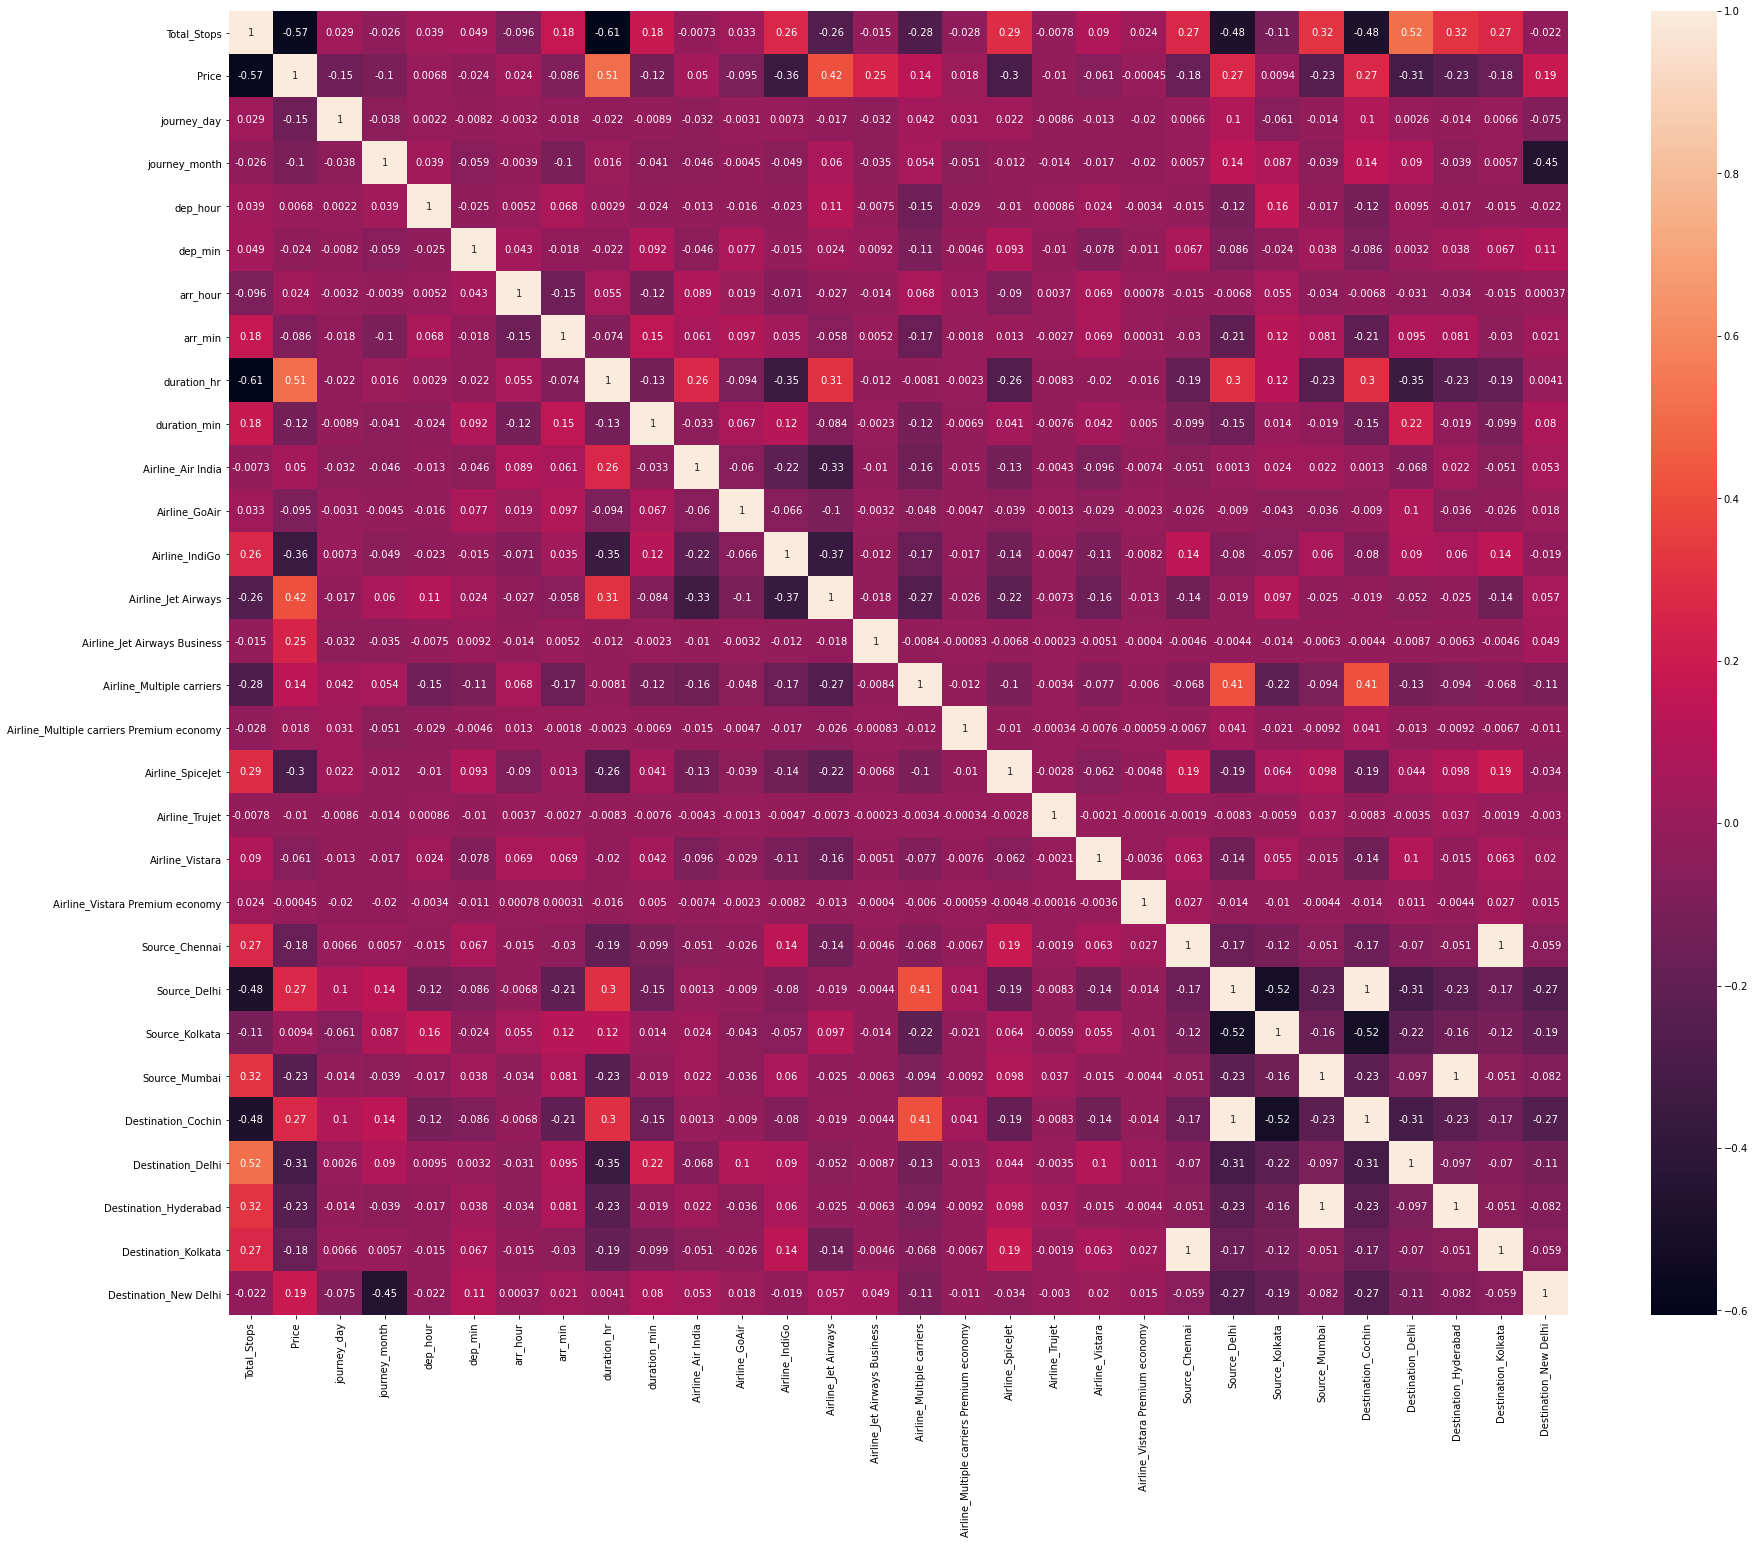

In [95]:
plt.figure(figsize=(30,24))
sns.heatmap(df.corr(),annot=True)

In [96]:
df.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hr', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [97]:
x=df.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hr', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y=df.iloc[:,1]

In [99]:
df.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hr,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [102]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

In [103]:
etr.fit(x,y)

ExtraTreesRegressor()

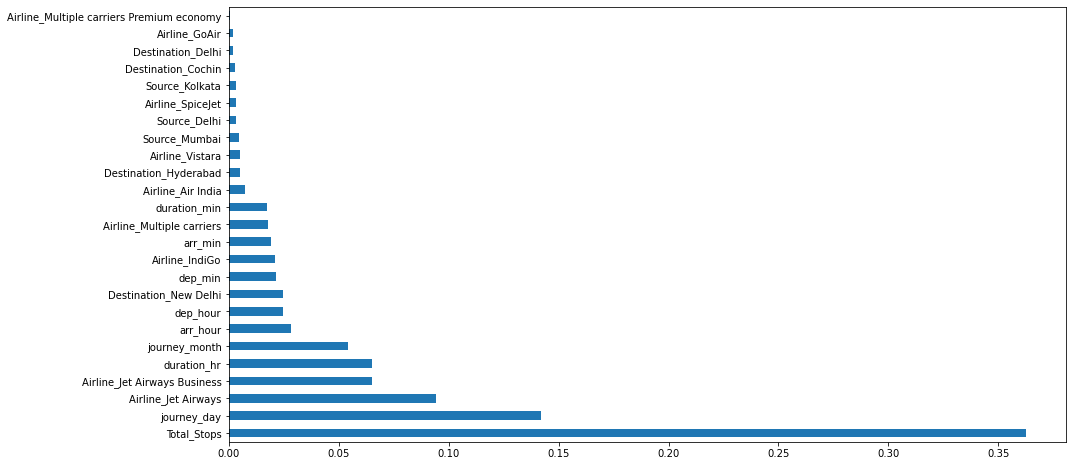

In [106]:
plt.figure(figsize=(15,8))
pd.Series(etr.feature_importances_,index=x.columns).nlargest(25).plot(kind='barh')

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [133]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100, 150]
min_samples_leaf = [1, 2, 5, 10,15,20]

In [134]:
params={'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [135]:
model=RandomizedSearchCV(estimator=rf,param_distributions=params,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=5,n_jobs=1)

In [136]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20, total=  28.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20, total=  29.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20, total=  28.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20, total=  26.7s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=15, max_features=auto, max_depth=20, total=  27.2s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.9s
[CV] n_estimators=1100, min_s

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   7.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   7.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   7.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   7.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   7.1s
[CV] n_estimators=1200, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              150],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, scoring='neg_mean_squared_error', verbose=2)

In [137]:
model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [138]:
y_pred=model.predict(x_test)

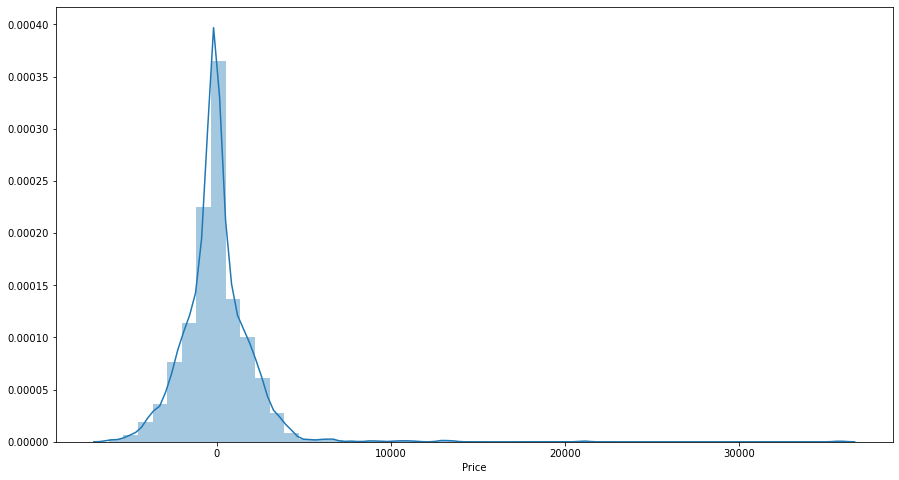

In [139]:
plt.figure(figsize=(15,8))
sns.distplot(y_test -y_pred)

Text(0, 0.5, 'Predicted')

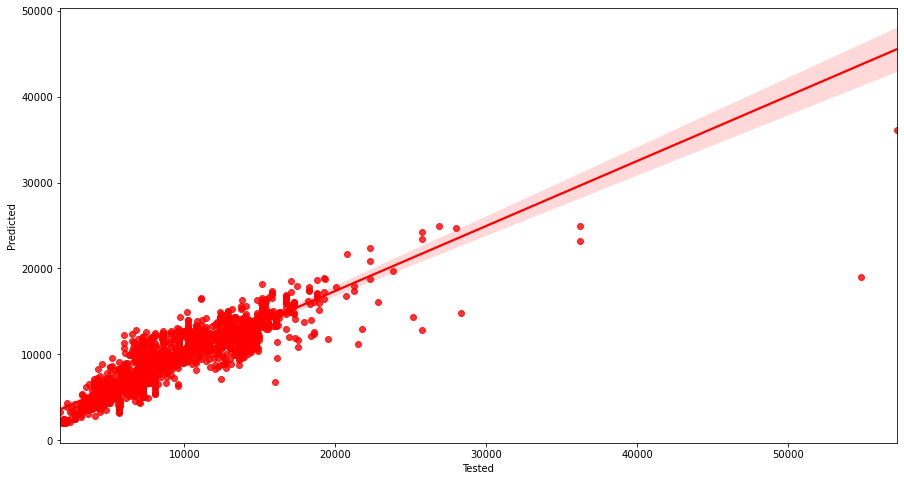

In [148]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,marker='o',color='red')
plt.xlabel("Tested")
plt.ylabel("Predicted")

In [150]:
import pickle
file=open('model3.pkl','wb')
pickle.dump(model,file)

In [151]:
f=open('model3.pkl','rb')
forest=pickle.load(f)

In [152]:
y_pre=forest.predict(x_test)

In [153]:
r2_score(y_test,y_pre)

0.8027754970166063